Verificando informações referentes aos dados de nascimentos dos animais por linhagem

In [77]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [78]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [79]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [80]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
DBA/1J        24
Swiss-2 B     24
Swiss-2 A     21
Swiss-2 E     21
Swiss-2 D     21
AG129          9
Name: ling, dtype: int64

In [81]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [82]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = sem_out[sem_out['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,5.986486,666.0,666.0,666.0,666.0,666.0,666.0,1.040541,1.520270,5.986486,545.128378,482.216216,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,7.488069,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.592191,7.488069,507.774403,476.221258,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.020316,666.0,666.0,666.0,666.0,666.0,666.0,1.004515,1.677201,8.020316,562.851016,504.492099,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.198381,666.0,666.0,666.0,666.0,666.0,666.0,1.008097,1.684211,6.198381,537.202429,545.190283,666.0,666.0


In [83]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = sem_out[sem_out['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.130435,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.217391,10.130435,579.565217,594.021739,666.0,666.0
Swiss-1 B,10.085714,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.314286,10.085714,552.428571,552.400000,666.0,666.0
Swiss-1 C,9.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.352941,9.500000,529.558824,568.676471,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,9.585366,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.365854,9.585366,617.585366,552.951220,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,10.250000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.250000,500.300000,599.850000,666.0,666.0


In [84]:
#Criando um Dataframe pra plotar minhas séries temporais:

serie_temp_ling = pd.DataFrame(sem_out['date_hoje'])
serie_temp_ling['ling'] = sem_out['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_ani'] = sem_out['num_ani']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [85]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.
# serie_temp_ling.to_csv('../tabelas_test/serie_temp_ling.csv')

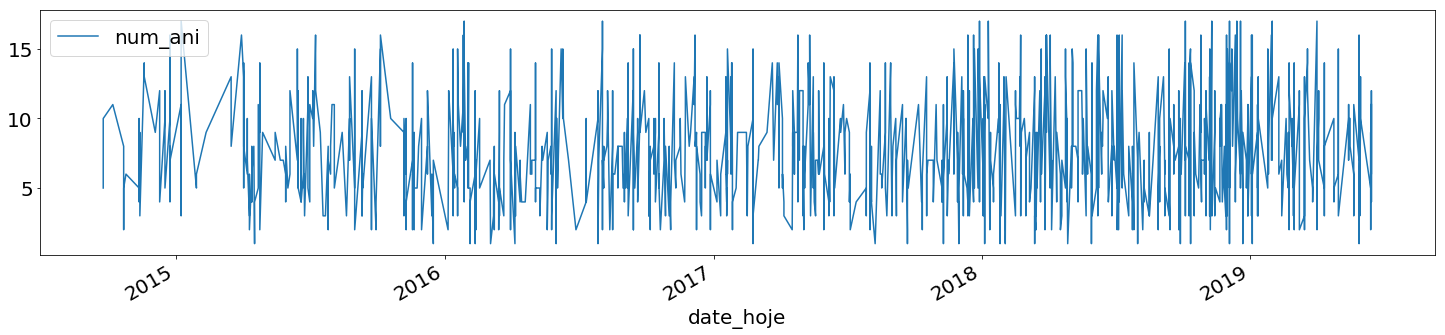

In [86]:
#Plotando numero de animais produzidos por ano.
serie_temp_ling.plot(

figsize=(25,5)
)


In [87]:
#Biblioteca com funções para trabalhar series temporais.
from statsmodels.tsa.seasonal import seasonal_decompose

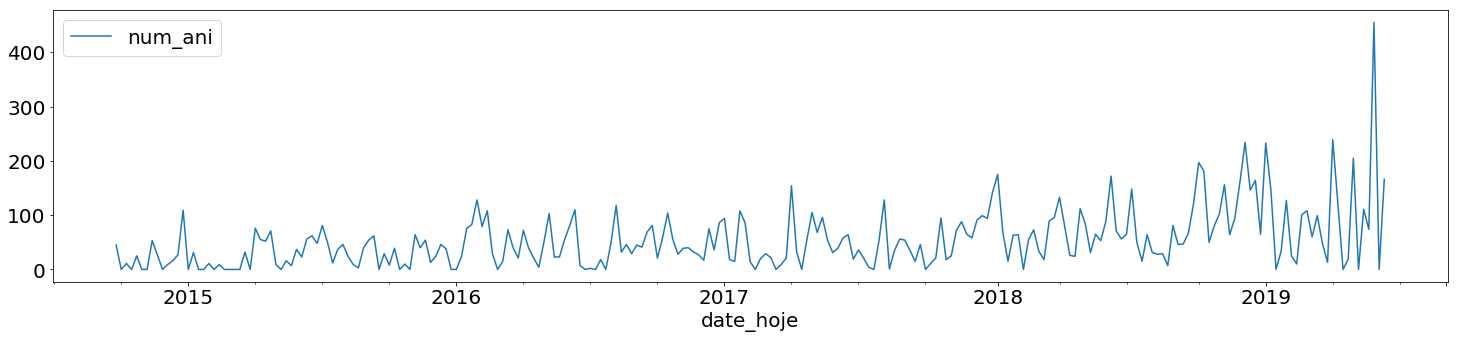

In [88]:
semana = serie_temp_ling.resample('W').sum().plot(
figsize=(25, 5)
)

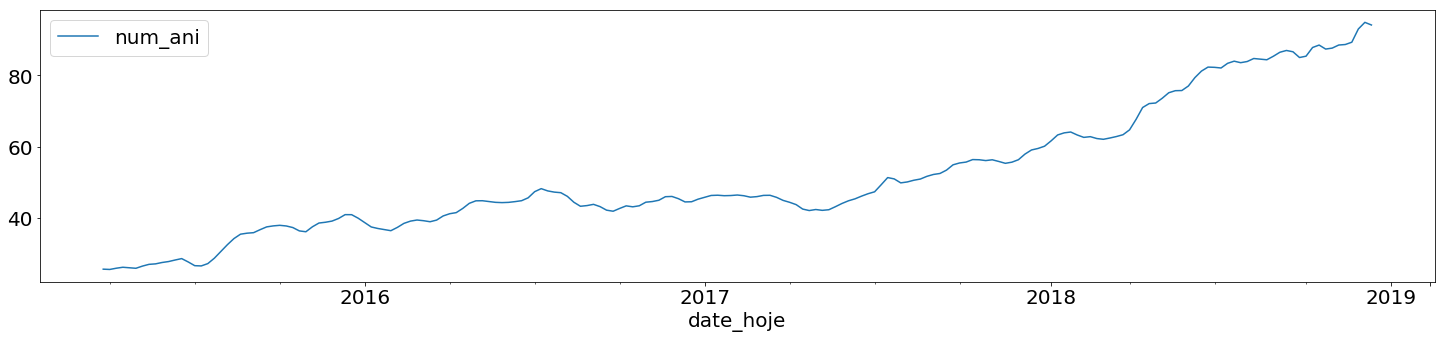

In [89]:
#Plotando minha tendência
semana = serie_temp_ling.resample('W').sum()
dec = seasonal_decompose(semana)
dec.trend.plot(
        figsize=(25, 5)
)

In [90]:
# dec.seasonal.plot(
#         figsize=(25, 5)
# )

In [91]:
# dec.resid.plot(
#         figsize=(25, 5)
# )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [92]:
tempo_mes = serie_temp_ling.resample('M').sum()
tempo_mes.head()

,num_ani
date_hoje,
2014-09-30,45
2014-10-31,36
2014-11-30,80
2014-12-31,161
2015-01-31,42


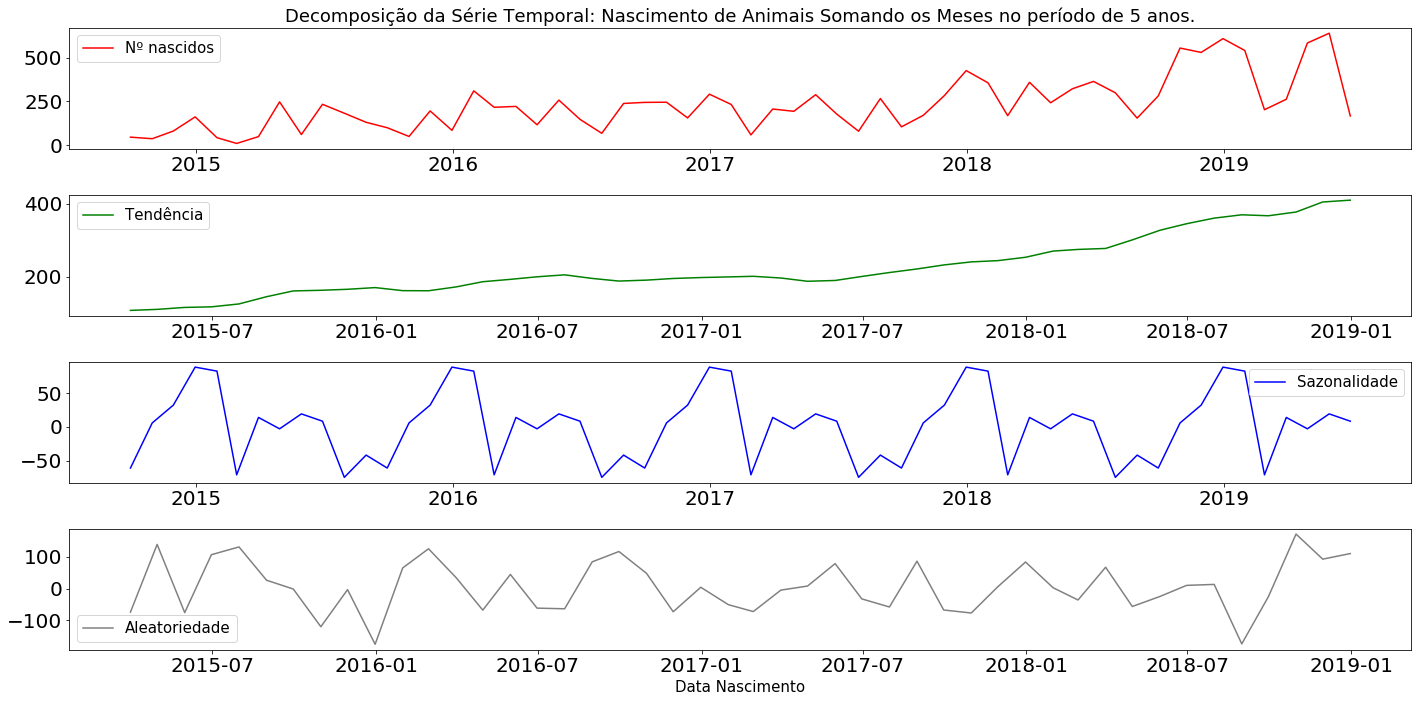

In [93]:
#1) Série temporal somando o numero de animais de todos os meses por ano

tempo_mes = serie_temp_ling.resample('M').sum().dropna()  #pegando minha série e pela função .resample() somando todos os meses entre os anos e .dropna()tirando valores NA
decom = seasonal_decompose(tempo_mes, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 15}) #tamanho da fonte

plt.title('Decomposição da Série Temporal: Nascimento de Animais Somando os Meses no período de 5 anos.') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandomeses.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [94]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.

# tempo_mes.to_csv('../tabelas_test/test_tempo_mes.csv')

In [95]:
tempo_semana = serie_temp_ling.resample('W').sum().dropna()
tempo_semana.head()

,num_ani
date_hoje,
2014-09-28,45
2014-10-05,0
2014-10-12,11
2014-10-19,0
2014-10-26,25


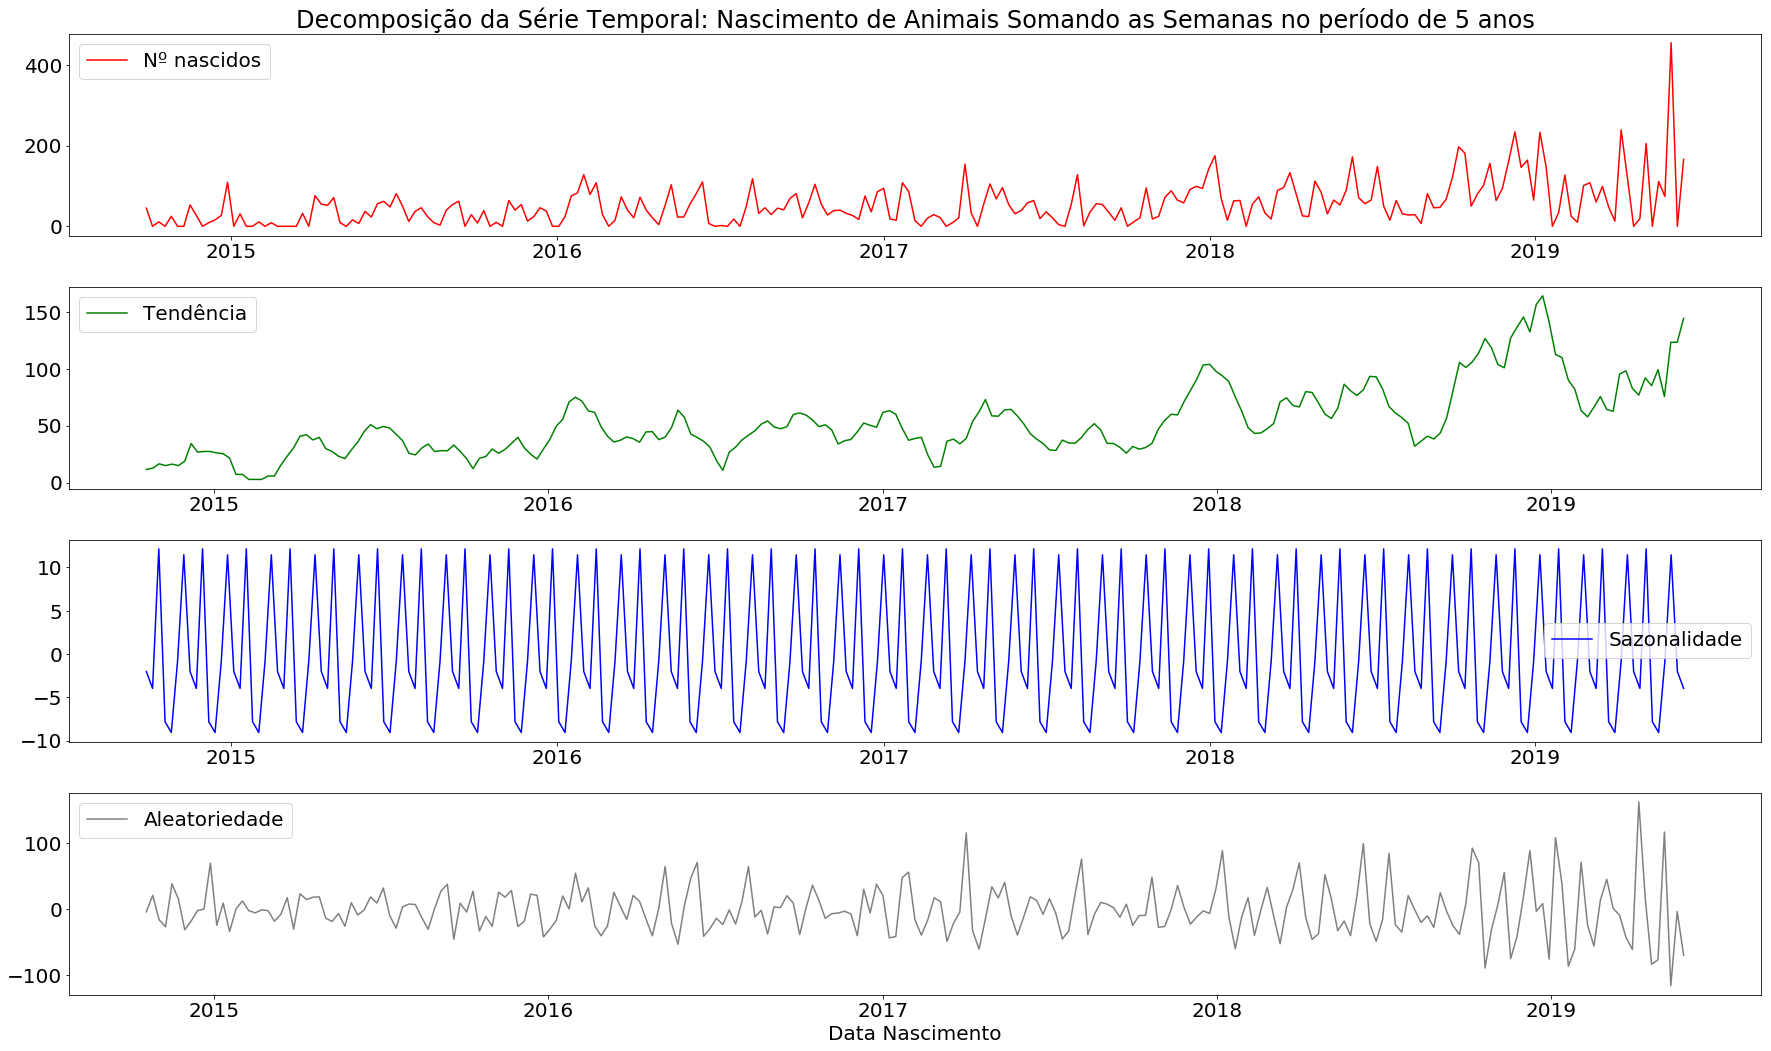

In [96]:
#2) Série temporal somando o numero de animais de todas as semanas por ano
tempo_semana = serie_temp_ling.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal: Nascimento de Animais Somando as Semanas no período de 5 anos') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandosemanas.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [97]:
# tempo_semana.to_csv('../tabelas_test/test_tempo_semana.csv')

GRUPO ISOGÊNICO

In [98]:
#Nova DataFrame filtranso apenas as linhagens isogênicas a partir da serie_temp_ling

ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

serie_lings_i = serie_temp_ling[serie_temp_ling['ling'].isin(ling_iso)]
serie_lings_i.head()

,ling,num_ani
date_hoje,,
2014-10-21 12:43:17,129/SV-E,8
2014-10-21 12:43:17,129/SV-E,2
2014-10-21 12:43:17,129/SV-E,4
2014-10-21 13:02:34,S129KO,5
2014-10-24 15:47:48,S129KO,6


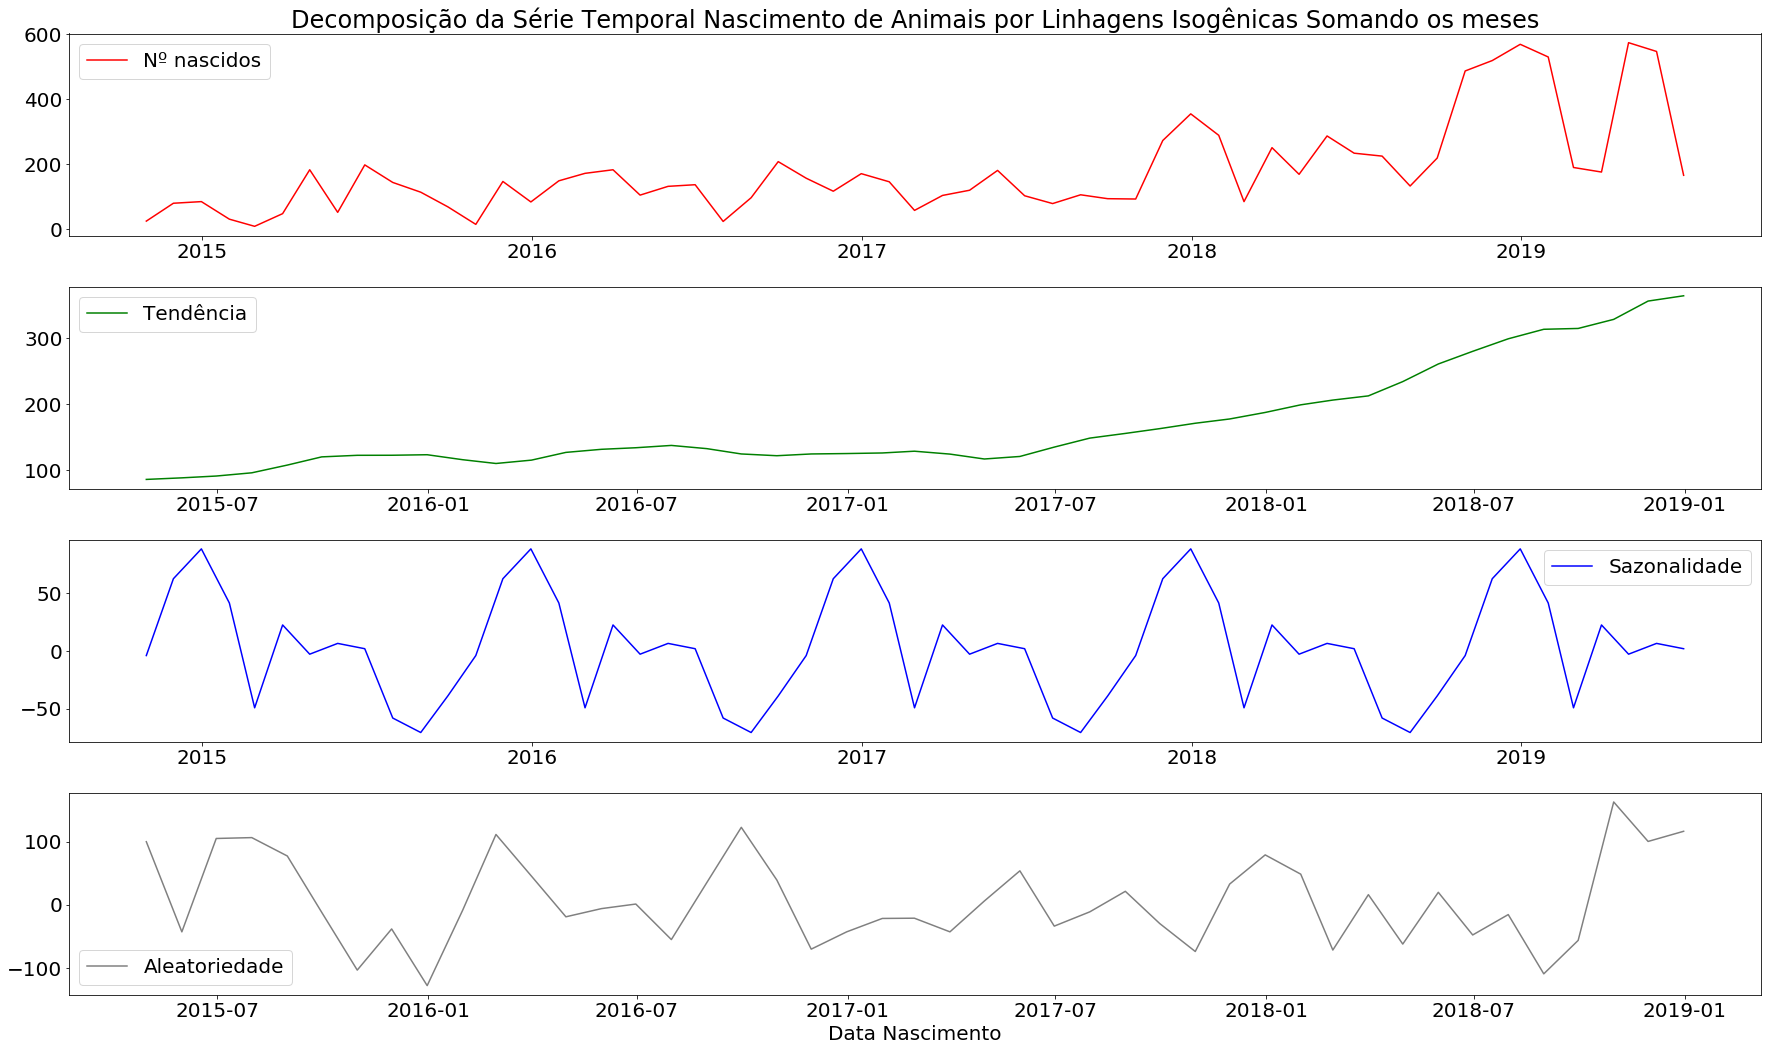

In [99]:
#3) Série temporal somando o numero de animais por linhagem isogênicas de todos os meses por ano
tempo_mes_iso = serie_lings_i.resample('M').sum().dropna()
decom = seasonal_decompose(tempo_mes_iso, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_iso, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandomeses_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

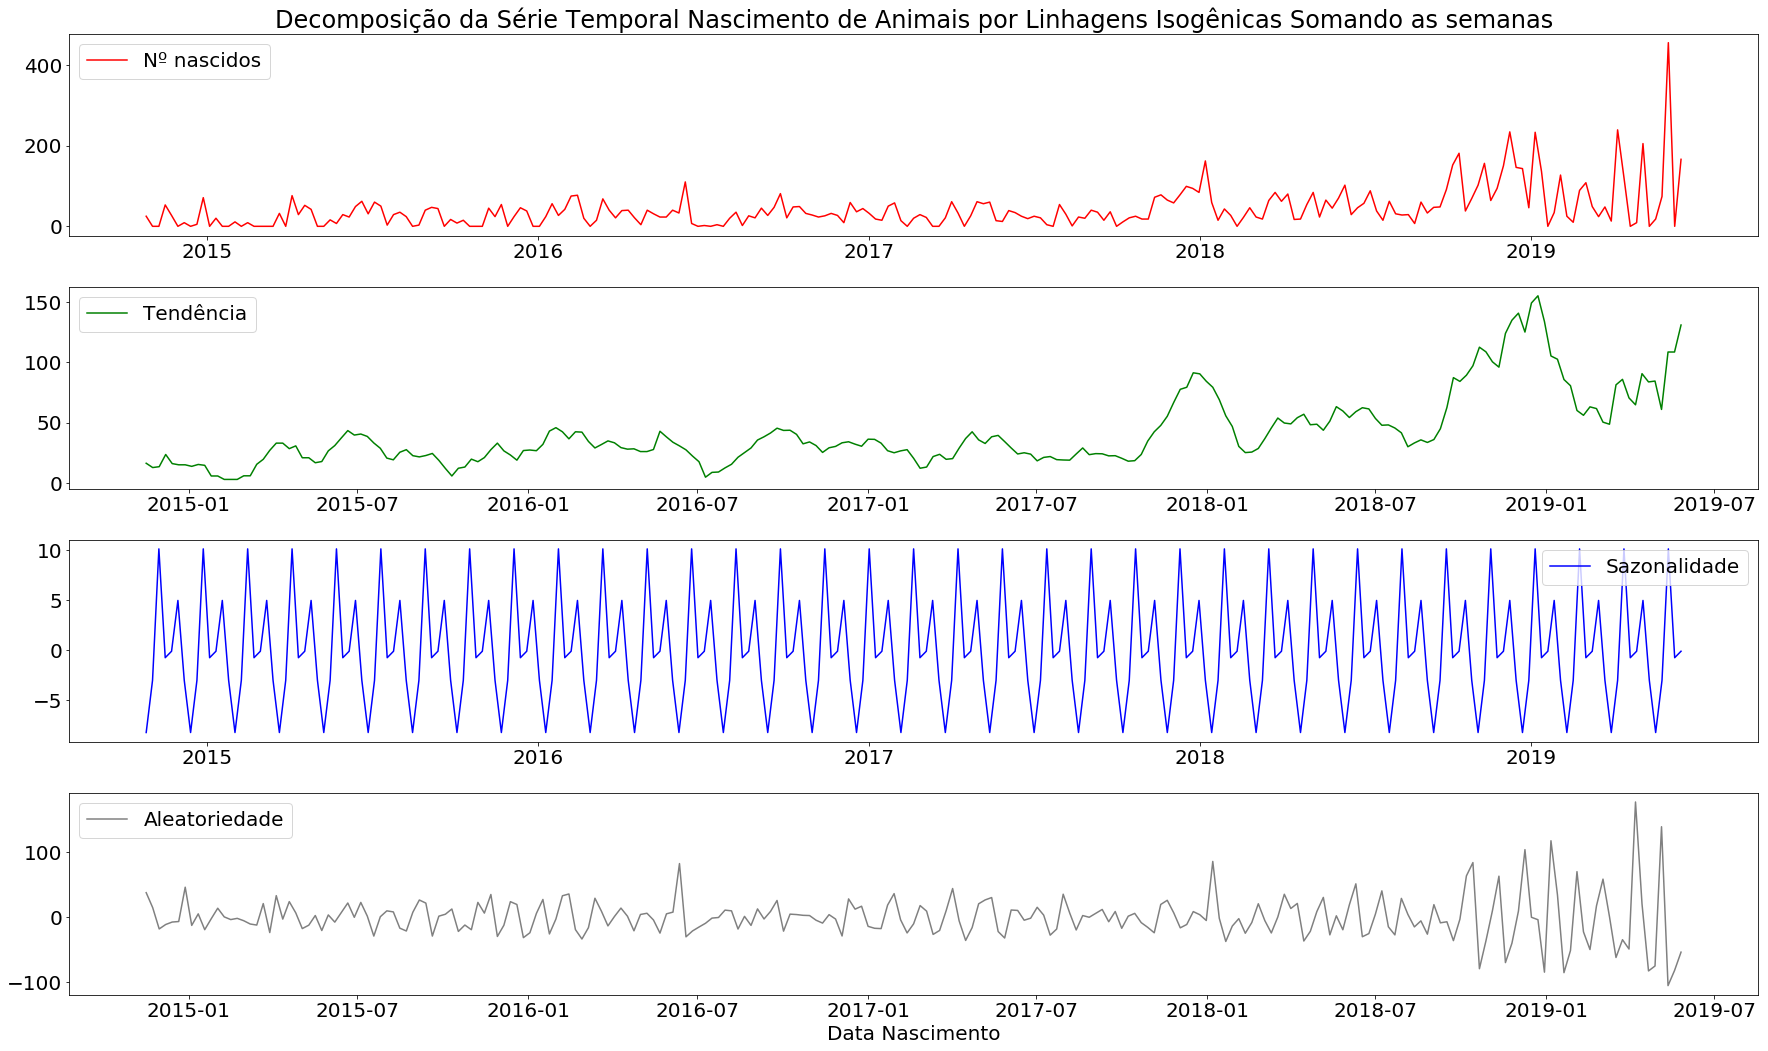

In [100]:
# 4) Série temporal somando o numero de animais por linhagem isogênica de todas as semanas por ano

tempo_semana_iso = serie_lings_i.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_iso, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_iso, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandosemanas_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRUPO HETEROGÊNICO

In [101]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']
serie_lings_h = serie_temp_ling[serie_temp_ling['ling'].isin(ling_het)]
serie_lings_h.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


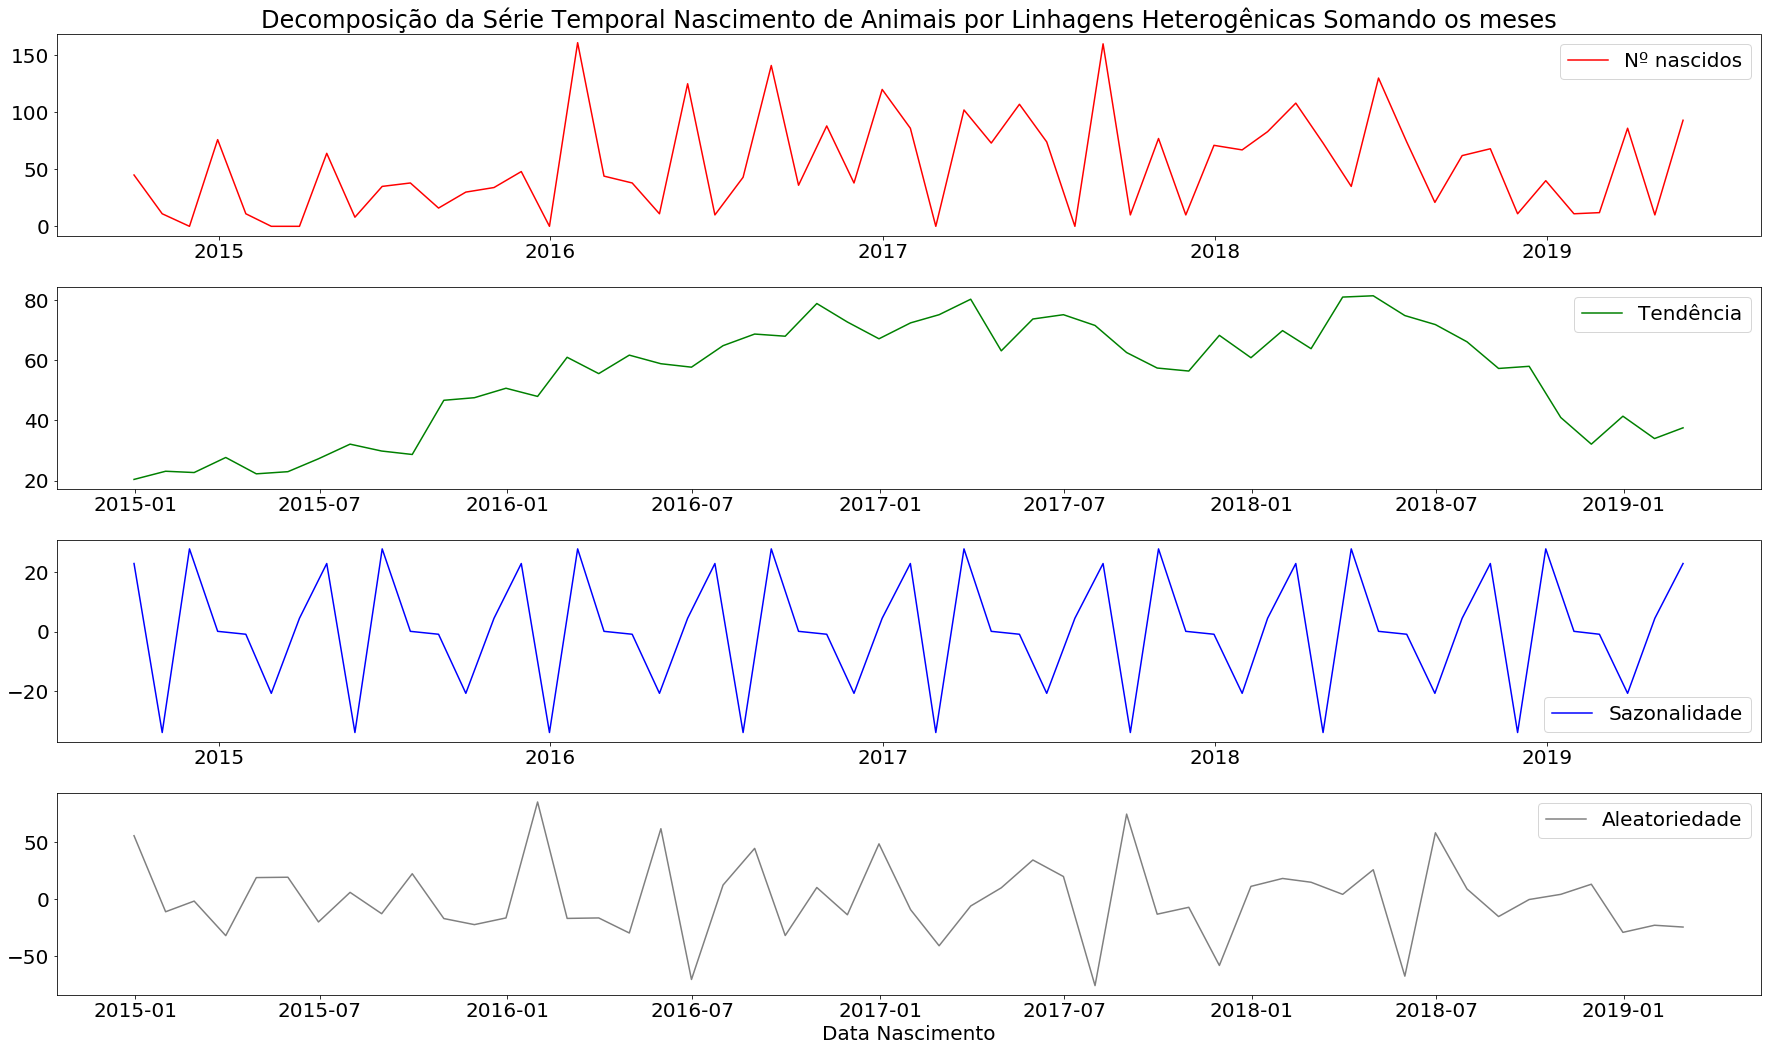

In [102]:
# 5) Série temporal somando o numero de animais por linhagem heterogênica de todos os meses por ano
tempo_mes_het = serie_lings_h.resample('M').sum().dropna()

decom = seasonal_decompose(tempo_mes_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_het, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandomeses_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

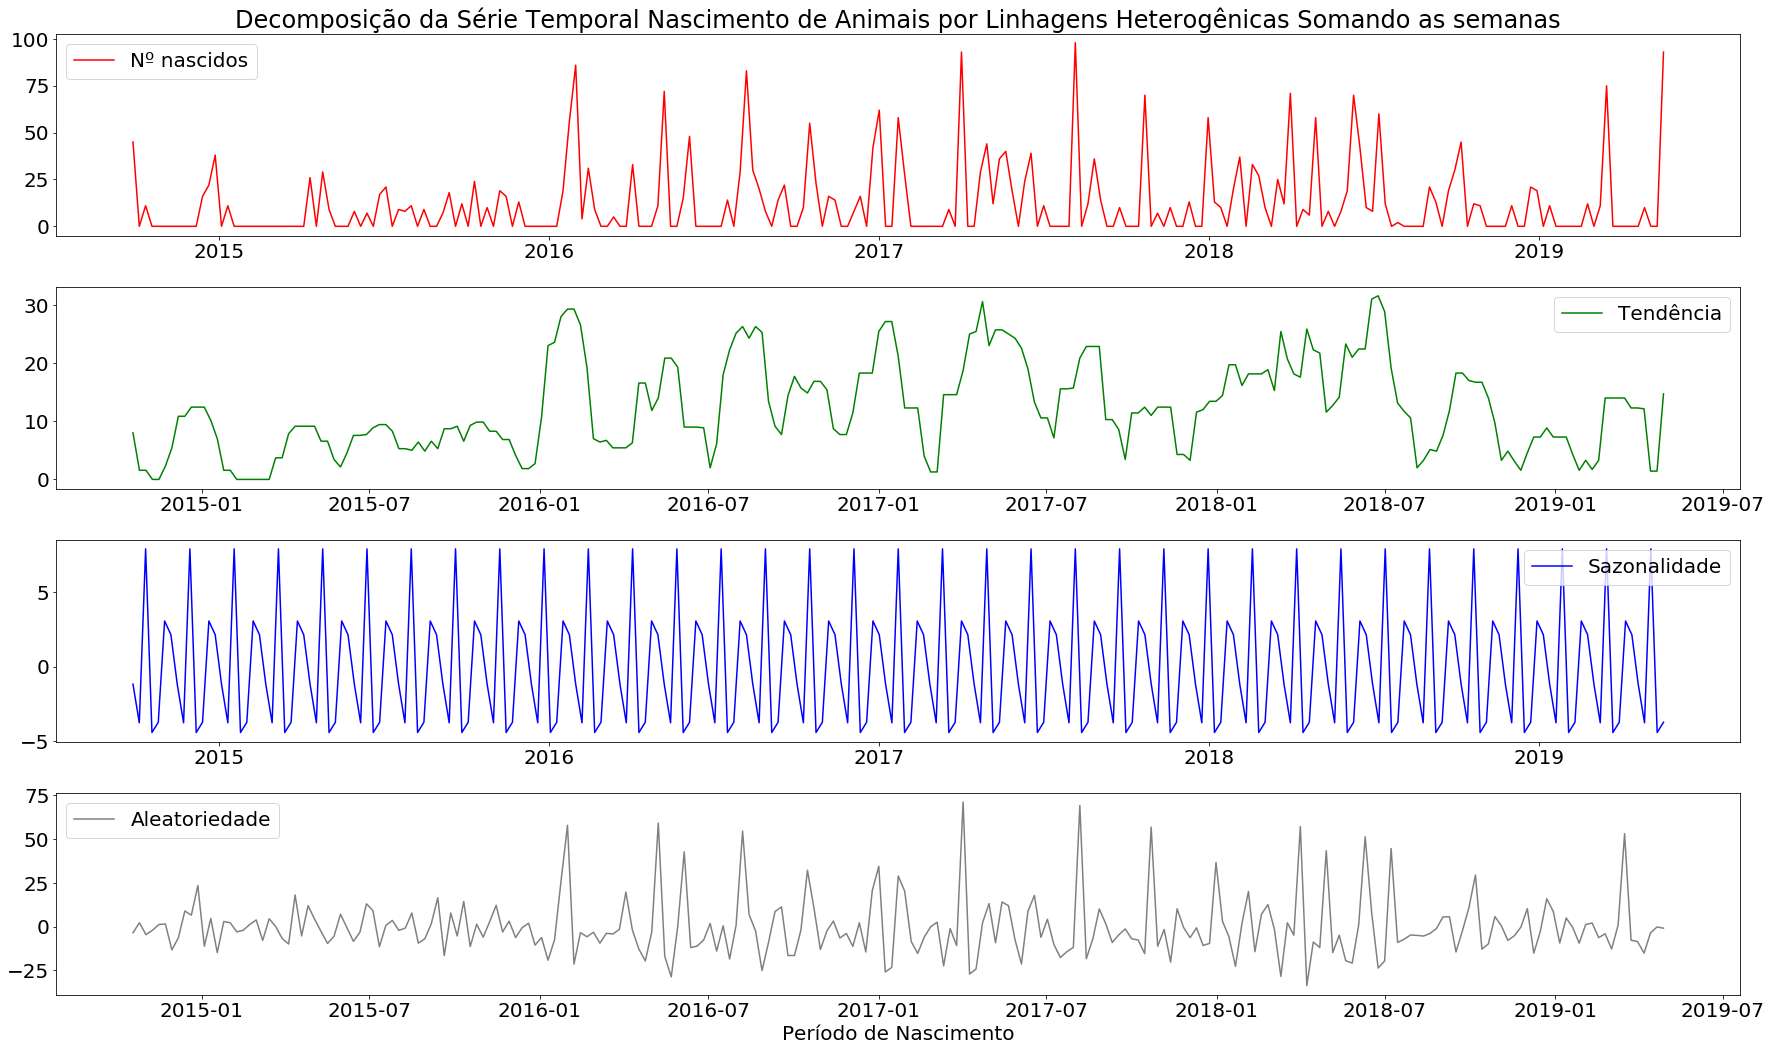

In [103]:
# 6) Série temporal somando o numero de animais por linhagem heterogênica de todas as semanas por ano
tempo_semana_het = serie_lings_h.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_het, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Período de Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-serietemporal_somandosemanas_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [104]:
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [105]:
test_dia = serie_temp_ling.groupby('ling')
test_dia_resul = test_dia.resample('D').sum().dropna()
test_dia_resul.head()

num_ani
ling     date_hoje          
129/SV-E 2014-10-21       14
         2014-10-22        0
         2014-10-23        0
         2014-10-24        0
         2014-10-25        0

+++++++++++++++++++++++++++++++++++++++++++++++++++++ PLOTANDO AS PREVISÕES ++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [106]:
from statsmodels.tsa.arima_model import ARIMA

In [107]:
serie_temp_ling.index.max()

Timestamp('2019-06-14 14:04:31')

In [108]:
                                                      #Testando a função .resample() que soma todos os animais por meses durante cada ano.
ts = serie_temp_ling.resample('M').sum()               #somando mês a mês
ts = ts['num_ani']                                     #para trabalhar com a previsão deve usar uma série, na qual foi escolhida 'num_ani'
ts.head()                                              #verificando se funciona

date_hoje
2014-09-30     45
2014-10-31     36
2014-11-30     80
2014-12-31    161
2015-01-31     42
Freq: M, Name: num_ani, dtype: int64

In [110]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

(0, 0, 0)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   58
Model:                     ARMA(0, 0)   Log Likelihood                -373.421
Method:                           css   S.D. of innovations            151.314
Date:                Mon, 27 Apr 2020   AIC                            750.842
Time:                        15:22:19   BIC                            754.963
Sample:                    09-30-2014   HQIC                           752.447
                         - 06-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.7069     19.868     11.561      0.000     190.765     268.648

(0, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                n

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsat

(1, 0, 1)
Não
Não
(1, 1, 0)
                             ARIMA Model Results                              
Dep. Variable:              D.num_ani   No. Observations:                   57
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -362.508
Method:                       css-mle   S.D. of innovations            139.781
Date:                Mon, 27 Apr 2020   AIC                            731.016
Time:                        15:22:20   BIC                            737.145
Sample:                    10-31-2014   HQIC                           733.398
                         - 06-30-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0651     14.417      0.282      0.779     -24.191      32.321
ar.L1.D.num_ani    -0.2910      0.140     -2.075      0.043      -0.566      -0.016
    

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 2, 0)
                             ARIMA Model Results                              
Dep. Variable:             D2.num_ani   No. Observations:                   56
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -375.201
Method:                       css-mle   S.D. of innovations            196.123
Date:                Mon, 27 Apr 2020   AIC                            756.402
Time:                        15:22:21   BIC                            762.478
Sample:                    11-30-2014   HQIC                           758.757
                         - 06-30-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.6078     17.822     -0.315      0.754     -40.538      29.322
ar.L1.D2.num_ani    -0.4797      0.123     -3.900      0.000      -0.721      -0.239
                  

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


(2, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   58
Model:                     ARMA(2, 1)   Log Likelihood                -373.691
Method:                       css-mle   S.D. of innovations            145.300
Date:                Mon, 27 Apr 2020   AIC                            757.382
Time:                        15:22:22   BIC                            767.685
Sample:                    09-30-2014   HQIC                           761.395
                         - 06-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2207.3562   1592.287      1.386      0.171    -913.470    5328.182
ar.L1.num_ani     1.9970        nan        nan        nan         nan         nan
ar.L2.num_ani    -0.9971      

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [119]:
teste = ARIMA(ts, order=(0, 1, 2))                  # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_tr = teste.fit()                             #ajusta o modelo ARIMA (p, d, q)
modelo_tr.summary()                                 #diagnosticar o pré-ajuste e o modelo ARIMA


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.num_ani   No. Observations:                   57
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -350.703
Method:                       css-mle   S.D. of innovations            110.090
Date:                Mon, 27 Apr 2020   AIC                            709.405
Time:                        15:44:06   BIC                            717.577
Sample:                    10-31-2014   HQIC                           712.581
                         - 06-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0515      1.062      5.697      0.000       3.970       8.133
ma.L1.D.num_ani    -0.7621      0.171     -4.449      0.000      -1.098      -0.426
ma.L2.D.num_ani    -0.2379      0.163     -1.458      0.151      -0.558       0.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -4.2040           +0.0000j            4.2040            0.5000
-----------------------------------------------------------------------------
"""

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


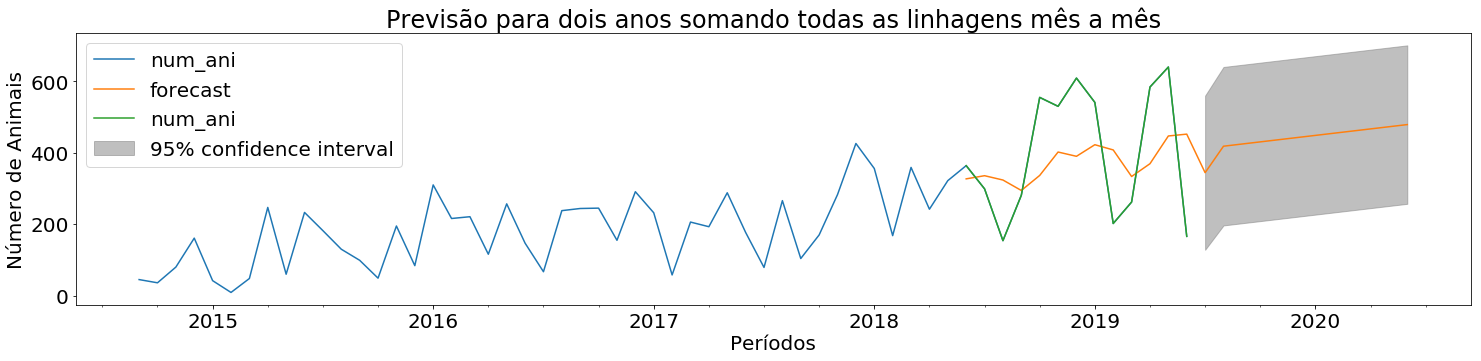

In [120]:
#previsão somando todas as linhagens mês a mês

prev = modelo_tr.forecast(steps=12)                                            #que irá te retornar a previsão para o período definido, que pode ser dias, meses, anos,
plt.figure(figsize=(25, 5))
modelo_tr.plot_predict('2018-06', '2020-06',                                   #decedindo o período de previsão
                       ax = ts.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Previsão para dois anos somando todas as linhagens mês a mês')

plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [116]:
prev[0] #Valores guardados nessa variável.

array([303.23721625, 460.00435735, 461.01136748, 426.78016616,
       426.3851439 , 441.73520571, 451.30045675, 455.6366739 ,
       460.47093184, 466.7663968 , 473.21462188, 479.31101681])

GRUPO ISOGÊNICO

In [117]:
#previsão para grupo isogênico.

ts_iso = serie_lings_i.resample('M').sum()
ts_iso = ts_iso['num_ani']
ts_iso.head()

date_hoje
2014-10-31    25
2014-11-30    80
2014-12-31    85
2015-01-31    31
2015-02-28     9
Freq: M, Name: num_ani, dtype: int64

In [121]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts_iso, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zf = out_full[ind]


(0, 0, 0)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   57
Model:                     ARMA(0, 0)   Log Likelihood                -363.432
Method:                           css   S.D. of innovations            142.175
Date:                Mon, 27 Apr 2020   AIC                            730.864
Time:                        15:45:29   BIC                            734.950
Sample:                    10-31-2014   HQIC                           732.452
                         - 06-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.6667     18.832      9.594      0.000     143.757     217.576

(0, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                n

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [122]:
#verificando os resultados para previsão.

teste_iso = ARIMA(ts_iso, order=(3, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_iso = teste_iso.fit()
modelo_iso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.num_ani   No. Observations:                   56
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -336.265
Method:                       css-mle   S.D. of innovations             96.788
Date:                Mon, 27 Apr 2020   AIC                            686.530
Time:                        15:45:33   BIC                            700.708
Sample:                    11-30-2014   HQIC                           692.027
                         - 06-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.8678      2.517      2.331      0.024       0.934      10.801
ar.L1.D.num_ani    -0.5660      0.311     -1.817      0.075      -1.176       0.044
ar.L2.D.num_ani    -0.0517      0.230     -0.225      0.823      -0.503       0.399
ar.L3.D.num_ani    -0.3944      0.169     -2.340      0.023      -0.725      -0.064
ma.L1.D.num_ani     0.1232      0.295      0.418      0.678      -0.455       0.701
ma.L2.D.num_ani    -0.7682      0.258     -2.976      0.004      -1.274      -0.262
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0535           -0.0000j            1.0535           -0.5000
AR.2            0.4612           -1.4813j            1.5514           -0.2020
AR.3            0.4612           +1.4813j            1.5514            0.2020
MA.1           -1.0636           +0.0000j            1.0636            0.5000
MA.2            1.2240           +0.0000j            1.2240            0.0000
-----------------------------------------------------------------------------
"""

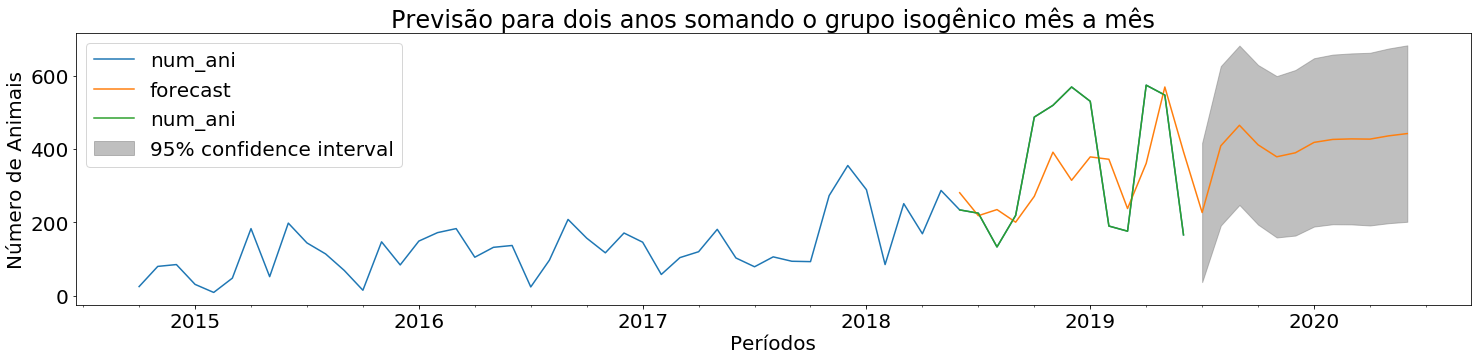

In [123]:
#previsão somando grupo isogênico mês a mês

prev = modelo_iso.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_iso.plot_predict('2018-06', '2020-06',
                       ax = ts_iso.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Previsão para dois anos somando o grupo isogênico mês a mês')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRUPO HETEROGÊNICO

In [124]:
ts_het = serie_lings_h.resample('M').sum()
ts_het = ts_het['num_ani']
ts_het.head()

date_hoje
2014-09-30    45
2014-10-31    11
2014-11-30     0
2014-12-31    76
2015-01-31    11
Freq: M, Name: num_ani, dtype: int64

In [126]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts_het, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

(0, 0, 0)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   57
Model:                     ARMA(0, 0)   Log Likelihood                -295.578
Method:                           css   S.D. of innovations             43.235
Date:                Mon, 27 Apr 2020   AIC                            595.157
Time:                        15:46:01   BIC                            599.243
Sample:                    09-30-2014   HQIC                           596.745
                         - 05-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0702      5.727      9.267      0.000      41.846      64.294

(0, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                n

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 0, 0)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   57
Model:                     ARMA(1, 0)   Log Likelihood                -294.395
Method:                       css-mle   S.D. of innovations             42.331
Date:                Mon, 27 Apr 2020   AIC                            594.789
Time:                        15:46:01   BIC                            600.918
Sample:                    09-30-2014   HQIC                           597.171
                         - 05-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.9759      4.681     11.318      0.000      43.802      62.150
ar.L1.num_ani    -0.2015      0.129     -1.556      0.125      -0.455       0.052
                              

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 2, 2)
                             ARIMA Model Results                              
Dep. Variable:             D2.num_ani   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -284.162
Method:                       css-mle   S.D. of innovations             36.950
Date:                Mon, 27 Apr 2020   AIC                            578.324
Time:                        15:46:02   BIC                            588.361
Sample:                    11-30-2014   HQIC                           582.205
                         - 05-31-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1204      0.032     -3.730      0.000      -0.184      -0.057
ar.L1.D2.num_ani    -0.4081      0.126     -3.227      0.002      -0.656      -0.160
ma.L1.D2.num_ani  

In [127]:
teste_het = ARIMA(ts_het, order=(1, 2, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_het = teste_het.fit()
modelo_het.summary()

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.num_ani   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -284.162
Method:                       css-mle   S.D. of innovations             36.950
Date:                Mon, 27 Apr 2020   AIC                            578.324
Time:                        15:49:16   BIC                            588.361
Sample:                    11-30-2014   HQIC                           582.205
                         - 05-31-2019                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1204      0.032     -3.730      0.000      -0.184      -0.057
ar.L1.D2.num_ani    -0.4081      0.126     -3.227      0.002      -0.656      -0.160
ma.L1.D2.num_ani    -1.9998      0.096    -20.775      0.000      -2.188      -1.811
ma.L2.D2.num_ani     0.9998      0.095     10.521      0.000       0.814       1.186
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4502           +0.0000j            2.4502            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

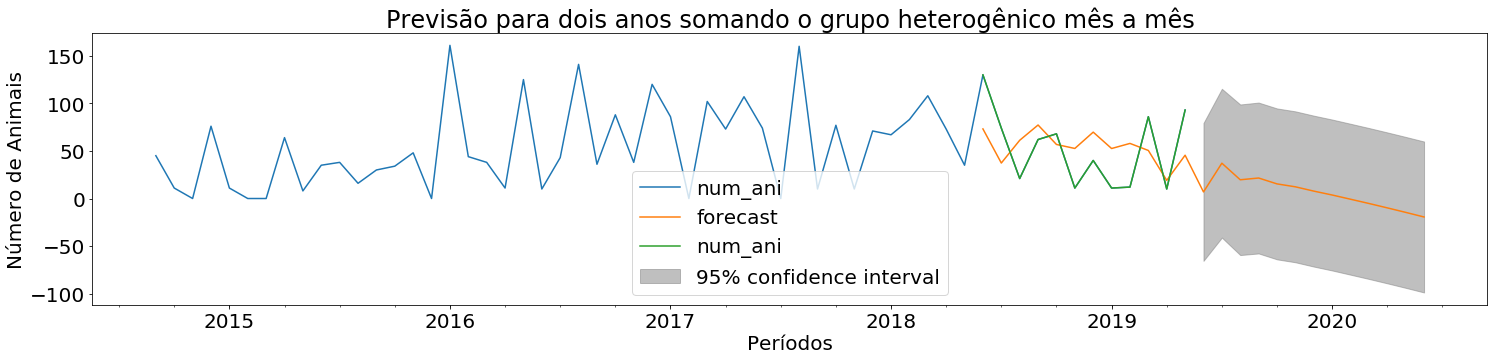

In [128]:
#previsão somando grupo heterogênico mês a mês

prev = modelo_het.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_het.plot_predict('2018-06', '2020-06',
                       ax = ts_het.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Previsão para dois anos somando o grupo heterogênico mês a mês')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)